In [153]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


In [3]:
df = pd.read_csv('Cleaned_SyriaTel_.csv')

In [4]:
df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charges,total_minutes,total_calls
0,0,KS,128,415,0,1,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,75.56,717.2,303
1,1,OH,107,415,0,1,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,59.24,625.2,332
2,2,NJ,137,415,0,0,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,62.29,539.4,333
3,3,OH,84,408,1,0,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,66.80,564.8,255
4,4,OK,75,415,1,0,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,52.09,512.0,359


In [5]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df['area_code']= df['area_code'].astype('object')

df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charges,total_minutes,total_calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,75.56,717.2,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,59.24,625.2,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,62.29,539.4,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,66.80,564.8,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,52.09,512.0,359


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

#### X-train y-train Split

In [6]:
X = df.drop('churn',axis=1)
y =df['churn'] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42,)

In [7]:
X_train.shape

(2333, 22)

In [8]:
y_train.shape

(2333,)

In [162]:
X_test.shape

(1000, 22)

In [163]:
y_test.shape

(1000,)

#### Seperating Categoricals and Numericals for OneHotEncoder

In [9]:
categoricals = list(X.select_dtypes(['object']).columns)
numericals = list(X.select_dtypes(['float64','int64']).columns)

In [165]:
numericals

['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'total_charges',
 'total_minutes',
 'total_calls']

In [166]:
categoricals

['state', 'area_code']

In [10]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

## Pipeline Constructor  

In [11]:
preprocessor = ColumnTransformer([
        ('num',StandardScaler(),numericals),
        ('cat', categorical_transformer,categoricals)
    ],remainder="passthrough")

### Need to throw in SMOTE to account for imbalanced target

In [12]:
clf = Pipeline([('preprocessor', preprocessor),('SMOTE',SMOTE()),('classifier',LogisticRegression())])

In [13]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

### Baseline Model (Logistic Regression)

In [172]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [173]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.761


### Build Function for Model Results

In [21]:
def results(model,X, y):
    y_pred = model.predict(X)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    plot_confusion_matrix(model,X,y,cmap="GnBu_r")

Accuracy Score: 0.780968709815688
Precision Score: 0.37626628075253254
Recall Score: 0.7647058823529411
F1 Score: 0.504364694471387


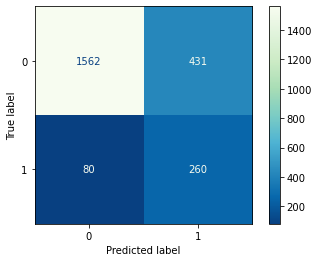

In [178]:
results(clf,X_train,y_train)

Accuracy Score: 0.761
Precision Score: 0.3431372549019608
Recall Score: 0.7342657342657343
F1 Score: 0.4677060133630289


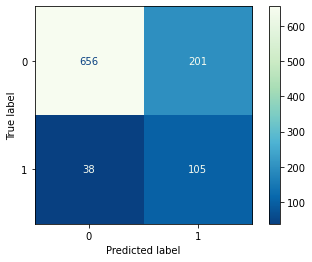

In [179]:
results(clf,X_test,y_test)

### Baseline Model Tuning

In [197]:
clf_params = {'classifier__max_iter': [1e3, 1e4], 
             'classifier__solver': ['liblinear', 'lbfgs']
             }

In [198]:
gs_pipe = GridSearchCV(clf,clf_params)

In [199]:
gs_pipe.fit(X_train,y_train);

In [200]:
gs_pipe.best_params_

{'classifier__max_iter': 10000.0, 'classifier__solver': 'liblinear'}

In [187]:
gs_pipe.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [202]:
best_log_model = gs_pipe.best_estimator_

Accuracy Score: 0.7801114444920703
Precision Score: 0.37553956834532376
Recall Score: 0.7676470588235295
F1 Score: 0.5043478260869565


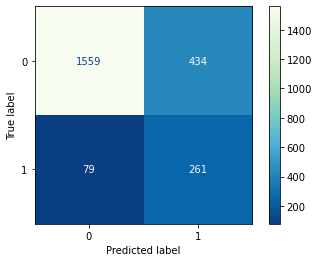

In [203]:
results(best_log_model,X_train,y_train)

Accuracy Score: 0.765
Precision Score: 0.35064935064935066
Recall Score: 0.7552447552447552
F1 Score: 0.4789356984478935


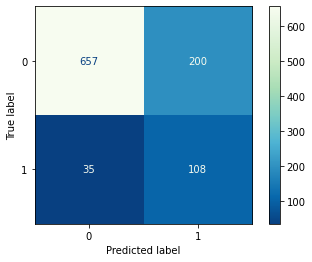

In [204]:
results(best_log_model,X_test,y_test)

### Ridge Regression

In [270]:
clf.steps.pop(-1)

['rr', Ridge()]

In [271]:
clf.steps.append(['rr',RidgeClassifier()])

In [272]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [273]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [275]:
print("Ridge Classifier score: %.3f" % clf.score(X_test, y_test))

Ridge Classifier score: 0.771


### Random Forests Classifier

In [277]:
clf.steps.pop(-1)

['rr', RidgeClassifier()]

In [281]:
clf.steps.append(['rf',RandomForestClassifier()])

In [283]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [284]:
print("Random Forest score: %.3f" % clf.score(X_test, y_test))

Random Forest score: 0.968


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


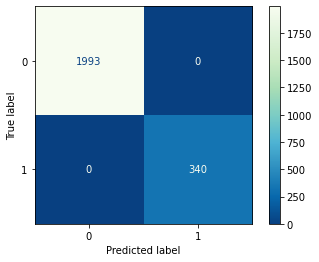

In [285]:
results(clf,X_train,y_train)

Accuracy Score: 0.968
Precision Score: 0.9826086956521739
Recall Score: 0.7902097902097902
F1 Score: 0.875968992248062


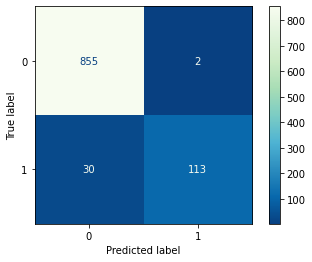

In [286]:
results(clf,X_test,y_test)

**Overfitting on train set, hyperparameter tuning to improve**

In [329]:
clf3_params = {'rf__criterion': ['gini', 'entropy'], 
               'rf__max_depth':[5,10,15],
               'rf__n_estimators':[15,20,25]
             
             }

In [330]:
gs_pipe = GridSearchCV(clf,clf3_params,cv=5)

In [331]:
%%time
gs_pipe.fit(X_train,y_train)

CPU times: user 15.9 s, sys: 474 ms, total: 16.4 s
Wall time: 18.7 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['account_length',
                                                                          'international_plan',
                                                                          'voice_mail_plan',
                                                                          'number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_charge',
         

In [332]:
gs_pipe.best_params_

{'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__n_estimators': 25}

In [333]:
gs_pipe.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [334]:
best_random_forest =gs_pipe.best_estimator_

Accuracy Score: 0.979854264894985
Precision Score: 1.0
Recall Score: 0.861764705882353
F1 Score: 0.9257503949447078


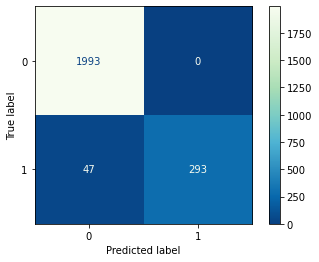

In [335]:
results(best_random_forest,X_train,y_train)

Accuracy Score: 0.967
Precision Score: 0.9661016949152542
Recall Score: 0.7972027972027972
F1 Score: 0.8735632183908045


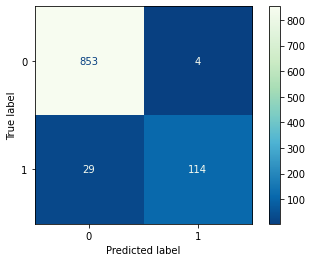

In [336]:
results(best_random_forest,X_test,y_test)

**Tried a few different options as far as tunning including (n_estimators, max_depth, min_samples_split, & min_samples_leaf.. all of which led to marginal overfitting.. leaving this as is due to the least amount of overfitting**

### Gradient Boosting

In [337]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [14]:
clf.steps.pop(-1)

('classifier', LogisticRegression())

In [15]:
clf.steps.append(['gb',GradientBoostingClassifier()])

In [16]:
clf.steps

[('preprocessor',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('num', StandardScaler(),
                                   ['account_length', 'international_plan',
                                    'voice_mail_plan', 'number_vmail_messages',
                                    'total_day_minutes', 'total_day_calls',
                                    'total_day_charge', 'total_eve_minutes',
                                    'total_eve_calls', 'total_eve_charge',
                                    'total_night_minutes', 'total_night_calls',
                                    'total_night_charge', 'total_intl_minutes',
                                    'total_intl_calls', 'total_intl_charge',
                                    'customer_service_calls', 'total_charges',
                                    'total_minutes', 'total_calls']),
                                  ('cat', OneHotEncoder(handle_unknown='ignore'),
                         

In [18]:
%%time
clf.fit(X_train,y_train)

CPU times: user 1.85 s, sys: 44.3 ms, total: 1.89 s
Wall time: 2.07 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [19]:
print("Gradient Boosting score: %.3f" % clf.score(X_test, y_test))

Gradient Boosting score: 0.980


Accuracy Score: 0.9777111015859409
Precision Score: 0.9931506849315068
Recall Score: 0.8529411764705882
F1 Score: 0.9177215189873418


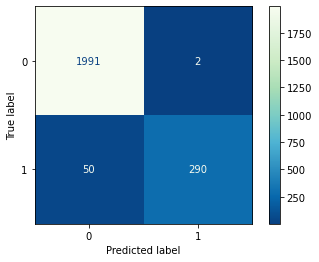

In [23]:
results(clf,X_train,y_train)

Accuracy Score: 0.98
Precision Score: 0.9694656488549618
Recall Score: 0.8881118881118881
F1 Score: 0.927007299270073


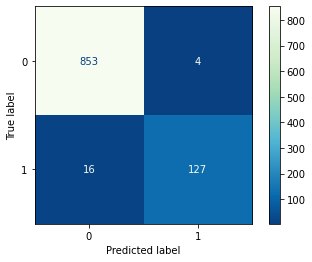

In [24]:
results(clf,X_test,y_test)

**Gradient boosting is on par with Decision Tree Classifier, having about a 2% difference on train and test set. Also took half the time to run with no hyperparameter tuning... Im in love... Still going to try and tune to see if anything improves**

In [25]:
clf4_params = {'gb__loss': ['deviance'], 
               'gb__learning_rate':[1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3],
               'gb__n_estimators':[30,40,60,80],
               'gb__min_samples_leaf':[10,20,30],
               'gb__random_state':[42]
             
             }

In [26]:
gs_pipe = GridSearchCV(clf,clf4_params,cv=5)

In [27]:
%%time
gs_pipe.fit(X_train,y_train)

CPU times: user 5min 55s, sys: 2.71 s, total: 5min 58s
Wall time: 6min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['account_length',
                                                                          'international_plan',
                                                                          'voice_mail_plan',
                                                                          'number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_charge',
         

In [31]:
gs_pipe.best_params_

{'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__min_samples_leaf': 10,
 'gb__n_estimators': 80,
 'gb__random_state': 42}

In [32]:
gs_pipe.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [33]:
best_gradient_boost=gs_pipe.best_estimator_

Accuracy Score: 0.9729961423060437
Precision Score: 0.9632107023411371
Recall Score: 0.8470588235294118
F1 Score: 0.9014084507042254


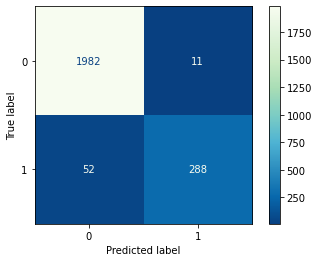

In [34]:
results(best_gradient_boost,X_train,y_train)

Accuracy Score: 0.975
Precision Score: 0.9338235294117647
Recall Score: 0.8881118881118881
F1 Score: 0.910394265232975


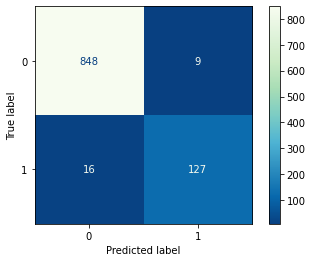

In [35]:
results(best_gradient_boost,X_test,y_test)

In [50]:
gs_pipe.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [53]:
gs_pipe.best_estimator_['gb'].feature_importances_

array([5.72075615e-04, 2.15544410e-01, 4.46925979e-02, 3.21070509e-04,
       1.47452612e-03, 1.72579557e-03, 1.48617403e-04, 4.49896533e-03,
       2.11338776e-03, 1.83493575e-04, 2.49257797e-03, 1.74381510e-03,
       8.59547608e-04, 7.84695889e-03, 2.62941537e-02, 1.23905062e-03,
       2.37574046e-01, 3.41494032e-01, 1.19890618e-03, 3.95256020e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.90920457e-04, 0.00000000e+00, 0.00000000e+00, 5.47846951e-03,
       1.06583279e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.39410264e-04, 1.58630844e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.32823746e-02, 1.65416672e-03,
       5.46972574e-04, 3.35824686e-03, 3.97946609e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.95784482e-03, 0.00000000e+00,
       5.11105070e-04, 1.58025249e-04, 0.00000000e+00, 7.73503604e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78836786e-03,
      

In [82]:
gs_pipe.best_estimator_[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['account_length', 'international_plan',
                                  'voice_mail_plan', 'number_vmail_messages',
                                  'total_day_minutes', 'total_day_calls',
                                  'total_day_charge', 'total_eve_minutes',
                                  'total_eve_calls', 'total_eve_charge',
                                  'total_night_minutes', 'total_night_calls',
                                  'total_night_charge', 'total_intl_minutes',
                                  'total_intl_calls', 'total_intl_charge',
                                  'customer_service_calls', 'total_charges',
                                  'total_minutes', 'total_calls']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['state', 'area_code'])])

In [81]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn', 'total_charges', 'total_minutes', 'total_calls'],
      dtype='object')

In [76]:
gs_pipe.best_estimator_[0].transformers_[1][1].get_feature_names()

array(['x0_AK', 'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT',
       'x0_DC', 'x0_DE', 'x0_FL', 'x0_GA', 'x0_HI', 'x0_IA', 'x0_ID',
       'x0_IL', 'x0_IN', 'x0_KS', 'x0_KY', 'x0_LA', 'x0_MA', 'x0_MD',
       'x0_ME', 'x0_MI', 'x0_MN', 'x0_MO', 'x0_MS', 'x0_MT', 'x0_NC',
       'x0_ND', 'x0_NE', 'x0_NH', 'x0_NJ', 'x0_NM', 'x0_NV', 'x0_NY',
       'x0_OH', 'x0_OK', 'x0_OR', 'x0_PA', 'x0_RI', 'x0_SC', 'x0_SD',
       'x0_TN', 'x0_TX', 'x0_UT', 'x0_VA', 'x0_VT', 'x0_WA', 'x0_WI',
       'x0_WV', 'x0_WY', 'x1_408', 'x1_415', 'x1_510'], dtype=object)

In [93]:
gs_pipe.best_estimator_[0].transformers_[0][2]

['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'total_charges',
 'total_minutes',
 'total_calls']

### Decision Tree Classifier

In [205]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [207]:
clf.steps.pop(-1)

('classifier', LogisticRegression())

In [212]:
clf.steps.append(['dtc',DecisionTreeClassifier()])

In [213]:
clf.steps

[('preprocessor',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('num', StandardScaler(),
                                   ['account_length', 'international_plan',
                                    'voice_mail_plan', 'number_vmail_messages',
                                    'total_day_minutes', 'total_day_calls',
                                    'total_day_charge', 'total_eve_minutes',
                                    'total_eve_calls', 'total_eve_charge',
                                    'total_night_minutes', 'total_night_calls',
                                    'total_night_charge', 'total_intl_minutes',
                                    'total_intl_calls', 'total_intl_charge',
                                    'customer_service_calls', 'total_charges',
                                    'total_minutes', 'total_calls']),
                                  ('cat', OneHotEncoder(handle_unknown='ignore'),
                         

In [214]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [247]:
print("Decision Tree score: %.3f" % clf.score(X_test, y_test))

model score: 0.942


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


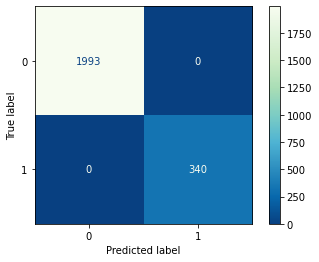

In [239]:
results(clf,X_train,y_train)

Accuracy Score: 0.942
Precision Score: 0.7544910179640718
Recall Score: 0.8811188811188811
F1 Score: 0.8129032258064516


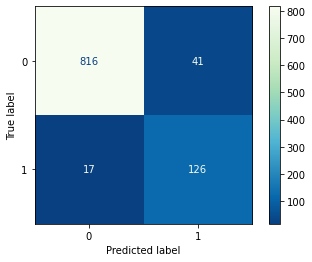

In [240]:
results(clf,X_test,y_test)

#### Way too overfit, need to tune Decision Tree Classifier to avoid overfitting

In [234]:
clf2_params = {'dtc__criterion': ['gini', 'entropy'], 
             'dtc__max_depth':[10,15,20],
               'dtc__min_samples_split':[10,15,20],
               'dtc__min_samples_leaf':[1,2,3,4,5],
               'dtc__max_leaf_nodes':[5,10,15]
             }

In [248]:
gs_pipe = GridSearchCV(clf,clf2_params,cv=5)

In [249]:
gs_pipe.fit(X_train,y_train);

In [246]:
gs_pipe.score

<bound method BaseSearchCV.score of GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['account_length',
                                                                          'international_plan',
                                                                          'voice_mail_plan',
                                                                          'number_vmail_messages',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_c

In [250]:
gs_pipe.best_params_

{'dtc__criterion': 'entropy',
 'dtc__max_depth': 10,
 'dtc__max_leaf_nodes': 15,
 'dtc__min_samples_leaf': 5,
 'dtc__min_samples_split': 20}

In [251]:
gs_pipe.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [252]:
best_decision_tree =gs_pipe.best_estimator_

Accuracy Score: 0.9717102443206173
Precision Score: 0.9536423841059603
Recall Score: 0.8470588235294118
F1 Score: 0.8971962616822429


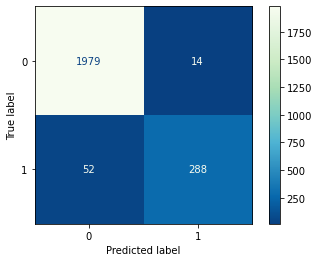

In [253]:
results(best_decision_tree,X_train,y_train)

Accuracy Score: 0.977
Precision Score: 0.9477611940298507
Recall Score: 0.8881118881118881
F1 Score: 0.9169675090252708


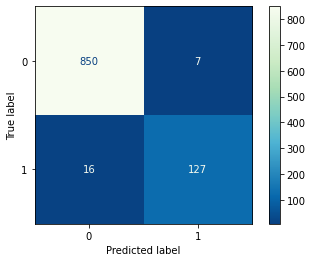

In [254]:
results(best_decision_tree,X_test,y_test)

#### Decision Tree Classifier is leading as the strongest model... something is sus

### K-Nearest Neighbors

In [396]:
clf.steps.pop(-1)

['gb', GradientBoostingClassifier()]

In [398]:
clf.steps.append(['kn',KNeighborsClassifier()])

In [400]:
clf.steps.pop(-1)

['kn', KNeighborsClassifier()]

In [401]:
clf.steps

[('preprocessor',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('num', StandardScaler(),
                                   ['account_length', 'international_plan',
                                    'voice_mail_plan', 'number_vmail_messages',
                                    'total_day_minutes', 'total_day_calls',
                                    'total_day_charge', 'total_eve_minutes',
                                    'total_eve_calls', 'total_eve_charge',
                                    'total_night_minutes', 'total_night_calls',
                                    'total_night_charge', 'total_intl_minutes',
                                    'total_intl_calls', 'total_intl_charge',
                                    'customer_service_calls', 'total_charges',
                                    'total_minutes', 'total_calls']),
                                  ('cat', OneHotEncoder(handle_unknown='ignore'),
                         

In [402]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'international_plan',
                                                   'voice_mail_plan',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                            

In [403]:
print("K Nearest score: %.3f" % clf.score(X_test, y_test))

K Nearest score: 0.771


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score: 0.8551221603086155
Precision Score: 0.5014749262536873
Recall Score: 1.0
F1 Score: 0.6679764243614931


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


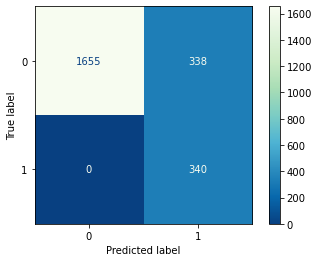

In [404]:
results(clf,X_train,y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score: 0.771
Precision Score: 0.36645962732919257
Recall Score: 0.8251748251748252
F1 Score: 0.50752688172043


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


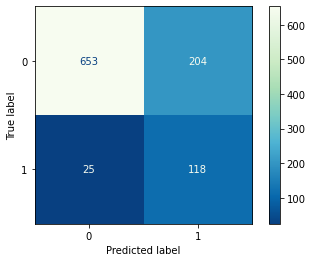

In [405]:
results(clf,X_test,y_test)

### Feature Selection given best models

# Modeling Conclusion

After running several models, the best performing is between Gradient Boosting and Decision Tree Classifier. 

Gradient Boosting 